# Image Classification Model Deployment - CNN

**Raynold Panji Zulfiandi**

> Emotion Detection

> Dataset: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.6.4


In [2]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-10-03 07:53:19.831597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 07:53:19.890445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 07:53:19.972048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 07:53:19.972998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Data Preparation

### Download Dataset (Google collbs)

In [8]:
!pip install -q kaggle
from google.colab import files 

# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"179ba11444d868e3058bb124fd96fb5e"}'}

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:
!mkdir datasets
!unzip -q emotion-detection-fer.zip -d datasets
!ls datasets

test  train


### Download Datasets (kaggle notebook)

In [29]:
!mkdir ./datasets
!cp -r ../input/emotion-detection-fer/* ./datasets
!ls -al datasets

total 16
drwxr-xr-x 4 root root 4096 Oct  3 08:11 .
drwxr-xr-x 4 root root 4096 Oct  3 08:10 ..
drwxrwxrwx 9 root root 4096 Oct  3 08:11 test
drwxrwxrwx 9 root root 4096 Oct  3 08:12 train


In [30]:
!chmod 777 ./datasets/train
!chmod 777 ./datasets/test

!ls datasets/test

angry  disgusted  fearful  happy  neutral  sad	surprised


# Data Cleansing

In [32]:
import os

TRAINING_DIR = 'datasets/train/'
VALIDATION_DIR = 'datasets/test/'

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)

(['surprised', 'disgusted', 'fearful', 'sad', 'happy', 'neutral', 'angry'],
 ['surprised', 'disgusted', 'fearful', 'sad', 'happy', 'neutral', 'angry'])

In [33]:
## cek jumlah dataset
def jum_data():
  train = []
  val = []
  lists = os.listdir(TRAINING_DIR)
  for cls in lists:
    train.append(len(os.listdir(os.path.join(TRAINING_DIR, cls))))
  for cls in lists:
    val.append(len(os.listdir(os.path.join(VALIDATION_DIR, cls))))
  return train, val, lists

def cek_data():
  chs = []
  train, val, lists = jum_data()
  
  msg="\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    ch = round(tot*0.8)
    chs.append(ch-train[i])
    percen = ": "+str(80)+"% dari total ✓✓" if (ch==train[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {train[i]} ===> {ch} {percen}"
  msg=msg+"\ntotal : "+str(sum(train))
  
  msg=msg+"\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    percen = ": "+str(20)+"% dari total ✓✓" if (round(tot*0.2)==val[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {val[i]} ===> {round(tot*0.2)} {percen}"
  msg=msg+"\ntotal : "+str(sum(val))

  msg=msg+"\n======================================"
  return msg, chs

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total disgusted	: 436 ===> 438 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total sad	: 4830 ===> 4862 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total angry	: 3995 ===> 3962 -
total : 28709
total surprised	: 831 ===> 800 -
total disgusted	: 111 ===> 109 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total sad	: 1247 ===> 1215 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total angry	: 958 ===> 991 -
total : 7178
[31, 2, 0, 32, -24, -7, -33]


In [34]:
## hapus folder disgusted
import shutil
shutil.rmtree(os.path.join(TRAINING_DIR, 'disgusted') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'disgusted'))

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total sad	: 4830 ===> 4862 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total angry	: 3995 ===> 3962 -
total : 28273
total surprised	: 831 ===> 800 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total sad	: 1247 ===> 1215 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total angry	: 958 ===> 991 -
total : 7067
[31, 0, 32, -24, -7, -33]


In [35]:
## pindahkan gambar agar sesuai kriteria 80/20

import random 

for i, dir in enumerate(jum_data()[2]):
  source = None
  dest = None

  if (cek_data()[1][i])<0:
    source = os.path.join(TRAINING_DIR, dir)
    dest = os.path.join(VALIDATION_DIR, dir)
  elif cek_data()[1][i]>0:
    source = os.path.join(VALIDATION_DIR, dir)
    dest = os.path.join(TRAINING_DIR, dir)
  
  if source==None:
    continue
  print("\n"+source+" ====> "+dest)
  files = os.listdir(source)

  for file_name in random.sample(files, abs(cek_data()[1][i])):
    shutil.move(os.path.join(source, file_name), os.path.join(dest, "mov_"+file_name))
    print(file_name+" moved")



datasets/test/surprised ====> datasets/train/surprised
im13.png moved
im564.png moved
im155.png moved
im524.png moved
im576.png moved
im388.png moved
im284.png moved
im547.png moved
im612.png moved
im518.png moved
im87.png moved
im313.png moved
im262.png moved
im95.png moved
im22.png moved
im626.png moved
im583.png moved
im362.png moved
im358.png moved
im48.png moved
im506.png moved
im148.png moved
im71.png moved
im171.png moved
im757.png moved
im711.png moved
im175.png moved
im189.png moved
im421.png moved
im795.png moved
im791.png moved

datasets/test/sad ====> datasets/train/sad
im398.png moved
im161.png moved
im819.png moved
im552.png moved
im734.png moved
im212.png moved
im574.png moved
im873.png moved
im86.png moved
im125.png moved
im60.png moved
im746.png moved
im665.png moved
im646.png moved
im1161.png moved
im390.png moved
im343.png moved
im56.png moved
im235.png moved
im1221.png moved
im733.png moved
im53.png moved
im24.png moved
im711.png moved
im832.png moved
im1063.png mo

In [36]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 7191 ===> 7191 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 28272
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1798 ===> 1798 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 7068
[0, 0, 0, 0, 0, 0]


In [37]:
## Undersampling class happy

avg_undersampling = (sum(jum_data()[0]) / len(jum_data()[0])) / 7191  # persentase 0.6553

train_happy = 7191 - round(7191 * avg_undersampling)  # total train - 65,53% dari total train data: 4712
val_happy = 1798 - round(1798 * avg_undersampling)    # total val - 65,53% dari total val data: 1178

train_dir = os.path.join(TRAINING_DIR, 'happy')
val_dir = os.path.join(VALIDATION_DIR, 'happy')

for i, file_name in enumerate(random.sample(os.listdir(train_dir), train_happy)):
  os.remove(os.path.join(train_dir, file_name))
print(str(train_happy)+" files removed ")

for i, file_name in enumerate(random.sample(os.listdir(val_dir), val_happy)):
  os.remove(os.path.join(val_dir, file_name))
print(str(val_happy)+" files removed ")

datasets/train/happy/im6957.png removed ==>[1]
datasets/train/happy/im7.png removed ==>[2]
datasets/train/happy/im1480.png removed ==>[3]
datasets/train/happy/im3333.png removed ==>[4]
datasets/train/happy/im4217.png removed ==>[5]
datasets/train/happy/im6559.png removed ==>[6]
datasets/train/happy/im110.png removed ==>[7]
datasets/train/happy/im5239.png removed ==>[8]
datasets/train/happy/im5176.png removed ==>[9]
datasets/train/happy/im4999.png removed ==>[10]
datasets/train/happy/im2281.png removed ==>[11]
datasets/train/happy/im5329.png removed ==>[12]
datasets/train/happy/im4738.png removed ==>[13]
datasets/train/happy/im1335.png removed ==>[14]
datasets/train/happy/im754.png removed ==>[15]
datasets/train/happy/im3208.png removed ==>[16]
datasets/train/happy/im4821.png removed ==>[17]
datasets/train/happy/im3822.png removed ==>[18]
datasets/train/happy/im3481.png removed ==>[19]
datasets/train/happy/im6753.png removed ==>[20]
datasets/train/happy/im985.png removed ==>[21]
dataset

In [38]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 4712 ===> 4712 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 25793
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1178 ===> 1178 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 6448
[0, 0, 0, 0, 0, 0]


In [39]:
## hapus class surprised dan fearful
shutil.rmtree(os.path.join(TRAINING_DIR, 'surprised') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'surprised'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'fearful'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'fearful'))

# shutil.rmtree(os.path.join(TRAINING_DIR, 'angry'))
# shutil.rmtree(os.path.join(VALIDATION_DIR, 'angry'))

print(cek_data()[0])
print(cek_data()[1])


total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 4712 ===> 4712 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 18494
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1178 ===> 1178 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 4624
[0, 0, 0, 0]


In [138]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][0:3]) / len(jum_data()[0][0:3])) - jum_data()[0][3]  # rata2 sad, happy, neutral - total data train angry: 882
val_sampling = (sum(jum_data()[1][0:3]) / len(jum_data()[1][0:3])) - jum_data()[1][3]    # rata2 sad, happy, neutral - total data val angry: 220

for u_dir in ['sad', 'happy', 'neutral']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
  print(f"{train_sampling} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
  print(f"{val_sampling} val {u_dir} files removed ")

882.0 files removed 
220.0 files removed 
882.0 files removed 
220.0 files removed 
882.0 files removed 
220.0 files removed 


In [139]:
print(cek_data()[0])
print(cek_data()[1])


total sad	: 3980 ===> 3980 : 80% dari total ✓✓
total happy	: 3830 ===> 3830 : 80% dari total ✓✓
total neutral	: 4076 ===> 4077 -
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 15848
total sad	: 995 ===> 995 : 20% dari total ✓✓
total happy	: 958 ===> 958 : 20% dari total ✓✓
total neutral	: 1020 ===> 1019 -
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 3964
[0, 0, 1, 0]


In [149]:
source = os.path.join(VALIDATION_DIR, 'neutral')
dest = os.path.join(TRAINING_DIR, 'neutral')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total sad	: 3980 ===> 3980 : 80% dari total ✓✓
total happy	: 3830 ===> 3830 : 80% dari total ✓✓
total neutral	: 4077 ===> 4077 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 15849
total sad	: 995 ===> 995 : 20% dari total ✓✓
total happy	: 958 ===> 958 : 20% dari total ✓✓
total neutral	: 1019 ===> 1019 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 3963
[0, 0, 0, 0]


# Data Preprocessing

In [150]:
## Augmentasi data

from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,        
)

img_height = 150
img_width = 150
batch_size = 25

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(      
    VALIDATION_DIR,    
    class_mode='categorical',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 15849 images belonging to 4 classes.
Found 3963 images belonging to 4 classes.


In [151]:
train_generator.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

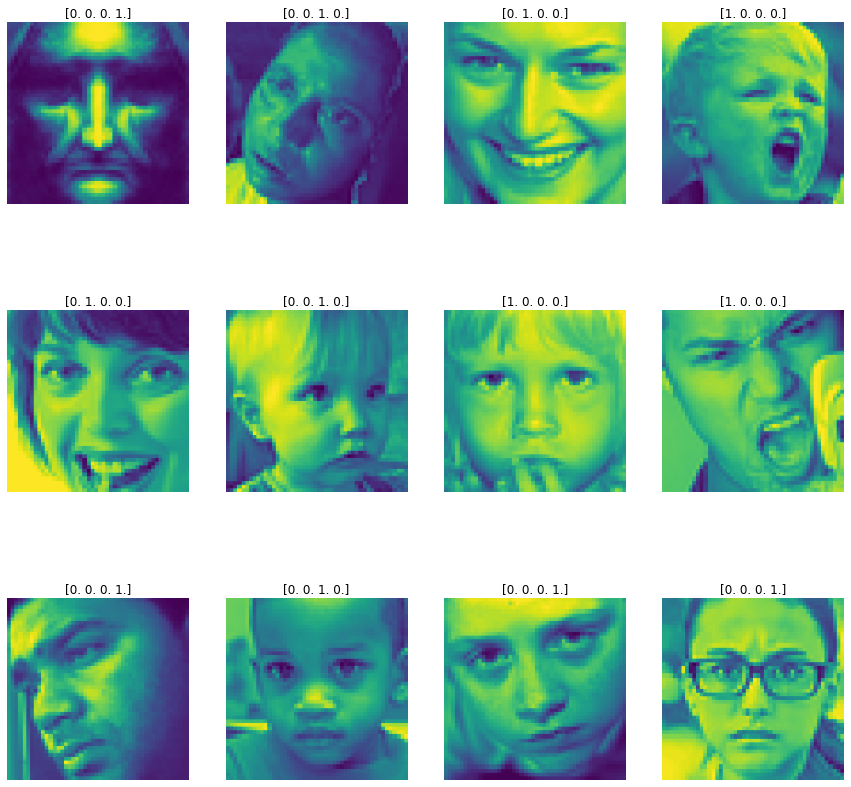

In [152]:
## Plot gambar

import matplotlib.pylab as plt

plt.figure(figsize=[15,15])
for i in range(12):
    x, y = random.choice(train_generator)
    plt.subplot(3, 4, i+1)
    for im, lb in zip(x, y):
        plt.title(str(lb))
        plt.imshow(im)
        plt.axis('off')
plt.show()

# Training

In [161]:
## build architecture
num_cls = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(img_height, img_width, 1), use_bias=True),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(64,(3,3), padding="same", activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),
  
#   tf.keras.layers.Conv2D(256,(3,3), padding="same", activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(512, activation="relu", use_bias=True),
#   tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Dense(128, activation="relu", use_bias=True),
#   tf.keras.layers.Dropout(0.2),
    
#   tf.keras.layers.Dense(64, activation="relu", use_bias=True),
#   tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(num_cls, activation="softmax")
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 150, 150, 128)     1280      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
dropout_40 (Dropout)         (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 37, 37, 64)        73792     
_________________________________________________________________
dropout_41 (Dropout)         (None, 37, 37, 64)      

In [162]:
## compile model

opt_adam = tf.optimizers.Adam(learning_rate=0.01)
opt_rms = tf.optimizers.RMSprop(learning_rate=1e-3)
opt_sgd = tf.optimizers.SGD(learning_rate=1e-2)

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = opt_sgd,
  metrics = ['accuracy']
)

In [163]:
## define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = "val_accuracy",
  patience = 5,
  verbose = 0,
  mode = "auto",
  restore_best_weights=True
)

callbacks = [early_stopping]

In [164]:
## Train model

STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

with tf.device("/device:GPU:0"):
  history = model.fit(
      train_generator,
      steps_per_epoch = STEP_PER_EPOCH,
      epochs = 35,
      validation_data = validation_generator,
      validation_steps = VALIDATION_STEPS,
      verbose = 1,
      callbacks = callbacks
  )

Epoch 1/35
633/633 [==============================] - 39s 61ms/step - loss: 1.3725 - accuracy: 0.3057 - val_loss: 1.3668 - val_accuracy: 0.2830
Epoch 2/35
633/633 [==============================] - 38s 60ms/step - loss: 1.3253 - accuracy: 0.3710 - val_loss: 1.3278 - val_accuracy: 0.3937
Epoch 3/35
633/633 [==============================] - 39s 61ms/step - loss: 1.2884 - accuracy: 0.4058 - val_loss: 1.3216 - val_accuracy: 0.3681
Epoch 4/35
633/633 [==============================] - 39s 61ms/step - loss: 1.2501 - accuracy: 0.4343 - val_loss: 1.2873 - val_accuracy: 0.4096
Epoch 5/35
633/633 [==============================] - 38s 60ms/step - loss: 1.2164 - accuracy: 0.4520 - val_loss: 1.2505 - val_accuracy: 0.4534
Epoch 6/35
633/633 [==============================] - 39s 62ms/step - loss: 1.1846 - accuracy: 0.4680 - val_loss: 1.2261 - val_accuracy: 0.4562
Epoch 7/35
633/633 [==============================] - 39s 62ms/step - loss: 1.1514 - accuracy: 0.4881 - val_loss: 1.2015 - val_accuracy:

In [165]:
## model evaluate

loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc*100}% \nvalid loss: {loss*100}%")

159/159 [==============================] - 3s 16ms/step - loss: 1.2609 - accuracy: 0.5410
valid accuracy: 54.10043001174927% 
valid loss: 126.0941743850708%


# Evaluation Model

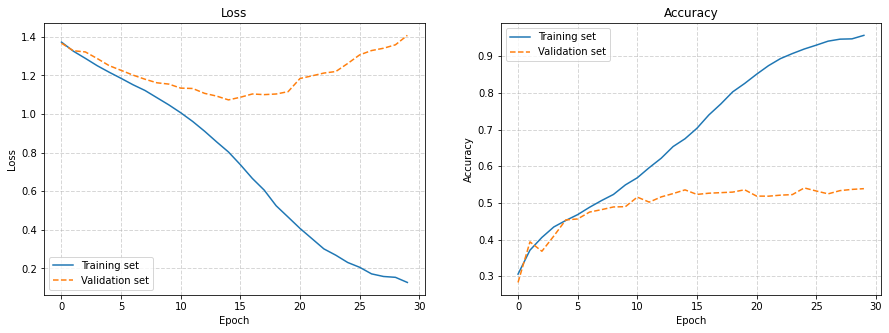

In [166]:
## Plot accuracy dan Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

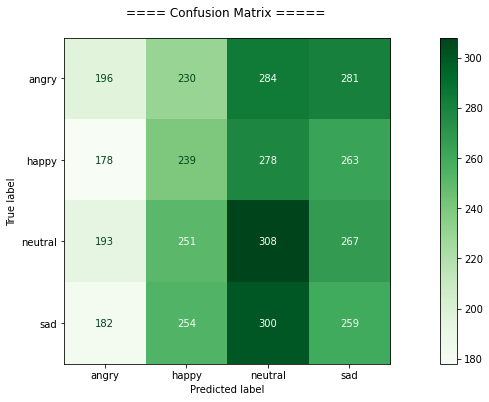


=============== Classification Report ================
              precision    recall  f1-score   support

       angry       0.26      0.20      0.23       991
       happy       0.25      0.25      0.25       958
     neutral       0.26      0.30      0.28      1019
         sad       0.24      0.26      0.25       995

    accuracy                           0.25      3963
   macro avg       0.25      0.25      0.25      3963
weighted avg       0.25      0.25      0.25      3963



In [169]:
## Plot Confusion Matrix dan Classification Report

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = list(train_generator.class_indices.keys())


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("\n=============== Classification Report ================")
print(classification_report(validation_generator.classes, y_pred, target_names=labels_list))

# Deployment

In [ ]:
## save model keras *.h5

if os.path.exists('model')==False:
  os.mkdir('model')

model.save_weights("model/model_weights.h5")
model.save("model/model.h5")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Convert Model keras ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

## save model *.tflite
with open('model/model.tflite', 'wb') as f:
  f.write(tflite_model)